# Convolución discreta

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Convolución discreta lineal

La convolución discreta lineal es una operación muy importante en la teoría de señales y sistemas. Formalmente, la convolución de dos señales discretas $x[n]$ and $h[n]$ se define como:

\begin{equation}
x[n] * h[n] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[n - \kappa] = \sum_{\kappa = -\infty}^{\infty} x[n - \kappa] \cdot h[\kappa]
\end{equation}

donde el símbolo $*$ se utiliza para denotar esta operación. Esta operación también se denota con el símbolo $\ast_l$, para explicitar que se trata de la convolución lineal. 


**Nota:** 
<div class="alert alert-block alert-info">
La notación $x[n] * h[n]$ no es formalmente correcta. Es importante recalcar que la convolución es una operación entre funciones y no una operación en la variable independiente, como esta notación insinúa. Es preferible usar la notación $(x * h)[n]$.
</div>

Obviamente, para que la convolución exista, la serie debe converger. 

### Propiedades

Dadas las señales $x[n]$, $h[n]$, $g[n] \in \mathbb{C}$ la convolución exhibe las siguientes propiedades: 

1. El impulso de Dirac es el [elemento identidad](https://en.wikipedia.org/wiki/Identity_element) de la convolución
    \begin{equation}
    x[n] * \delta[n] = x[n]
    \end{equation}
    
2. La convolución es [commutativa](https://en.wikipedia.org/wiki/Commutative_property) 
    \begin{equation}
    x[n] * h[n] = h[n] * x[n]
    \end{equation}
    
3. La convolución es [asociativa](https://en.wikipedia.org/wiki/Associative_property)
    \begin{equation}
    \left( x[n] * h[n] \right) * g[n] = x[n] * \left( h[n] * g[n] \right) 
    \end{equation}

5. La convolución es [distributiva](https://en.wikipedia.org/wiki/Distributive_property)
    \begin{equation}
    x[n] * \left( h[n] + g[n] \right) = x[n] * h[n] + x[n] * g[n]
    \end{equation}

5. Multiplicación por un escalar $a \in \mathbb{C}$
    \begin{equation}
    a \cdot \left( x[n] * h[n] \right) = \left( a \cdot x[n] \right) * h[n] = x[n] * \left( a \cdot h[n] \right)
    \end{equation}

La primera propiedad se conoce como la propiedad del cedazo del impulso. Las demás propiedades se pueden demostrar utilizando la definición de la convolución.

### Interpretación gráfica

La convolución usualmente se [interpreta de una manera gráfica](https://en.wikipedia.org/wiki/Convolution#Visual_explanation). Esta interpretación provee información muy útil para entender el cálculo que involucra la convolución y permite estimar su resultado en forma visual de forma rápida. 

\begin{equation}
y[n] = x[n] * h[n] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[n - \kappa]
\end{equation}

La operación anterior se puede descomponer en cuatro sub-operaciones: 

1. Sustituir $n$ por $\kappa$ en $x[n]$ y $h[n]$,

2. Reversar el eje del tiempo $h[\kappa]$ (espejamiento en el eje vertical),

3. Desplazar $h[- \kappa]$ por $n$ para obtener $h[n - \kappa]$, es decir un desplazamiento hacia la  **derecha** para $n>0$ o hacia la **izquierda** para $n<0$,

4. Determinar para cual $n = -\infty \dots \infty$ la versión espejada y desplazada $h[n - \kappa]$ se traslapa con $x[\kappa]$, calcula la suma específica para todos los $n$ relevantes para obtener $y[n]$

**Ejemplo**

Consideremos las señales discretas causales

\begin{align}
h[n] &=  e^{- \frac{n}{2}} u[n] \\
x[n] &= \frac{4}{5} \sqcap_N[n] 
\end{align}

donde $u[n]$ es el escalón, y $\sqcap_N$ es un rect de ancho $N$. Consideremos el caso $N=6$.

La señal $h[n]$ se puede interpretar como la respuesta al impulso de un sistema LTI que actúa como un filtro pasa-bajos simple. Por lo tanto, es esperable que los bordes de la señal de entrada se suavizen después de la convolución.

Antes de proceder, necesitamos definir algunas funciones auxiliares.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def step(n):
    return np.where(n >= 0, 1.0, 0.0)


def rect(n, N):
    return np.where((0 <= n) & (n < N), 1.0, 0.0)


def x(n):
    return 4/5 * rect(n, 6)


def h(n):
    return step(n) * np.exp(- n/2)


def plot_signals(n, x, h, xlabel, hlabel, klabel):
    plt.figure(figsize=(8, 4))
    plt.stem(n, x, linefmt='C0-', markerfmt='C0o', label=xlabel)
    plt.stem(n, h, linefmt='C1-', markerfmt='C1o', label=hlabel)
    plt.xlabel(klabel)
    plt.legend()
    plt.ylim([0, 1.2])
    plt.grid(True)

Las señales $x[n]$ y $h[n]$ son calculadas y graficadas para un rango específico de $n$.

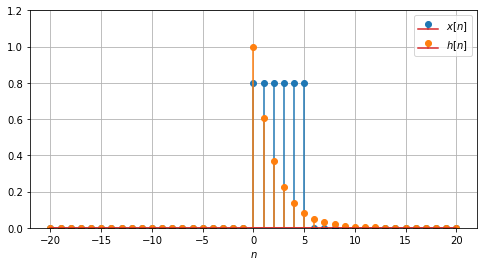

In [7]:
n = np.arange(-20, 21)

plot_signals(n, x(n), h(n), r'$x[n]$', r'$h[n]$', r'$n$')


El **primer paso** es sustituir $n$ por $\kappa$, tanto en $x[n]$ como en $h[n]$, para calcular $x[\kappa]$ y $h[\kappa]$.

Notamos que el eje horizontal representa ahora $\kappa$, que es una variable temporal auxiliar para calcular la suma. Esto se muestra en el siguiente gráfico.

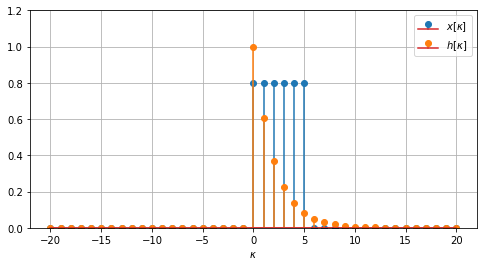

In [8]:
kappa = np.arange(-20, 21)

x1 = x(kappa)
h1 = h(kappa)

plot_signals(kappa, x1, h1, r'$x[\kappa]$', r'$h[\kappa]$', r'$\kappa$')

El **segundo paso** es reversar en el tiempo  $h[\kappa]$ en la eje de las ordenadas en torno a $\kappa=0$ para obtener $h[-\kappa]$

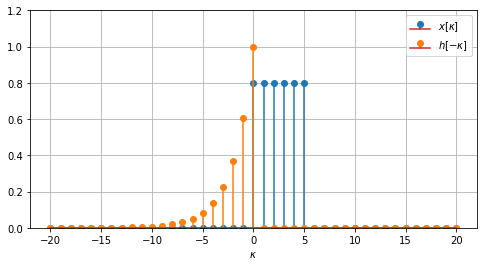

In [10]:
h2 = h(kappa[::-1])  

plot_signals(n, x1, h2, r'$x[\kappa]$', r'$h[-\kappa]$', r'$\kappa$')

En el **tercer paso** la respuesta al impulso $h[-\kappa]$ se desplaza en $n$ muestras para obtener $h[n - \kappa]$. Este desplazamiento se realiza hacia la **derecha** para $n>0$ y para la **izquierda** para $n<0$.

Para el **cuarto paso** es útil segmentar el cálculo del resultado de acuerdo al traslape entre $h[n-\kappa]$ y $x[\kappa]$.

En este ejemplo, hay que considerar tres casos:

1. No hay traslape para $n<0$,
2. Traslape parcial para $0 \leq n < 6$, y
3. traslape total para $n \geq 6$ (tomando en cuenta que la respuesta al impulso $h[n]$ es infinita y decae asintóticamente).

El primer caso, donde no hay traslape, se ilustra para $n= - 5$ (hacia la izquierda).


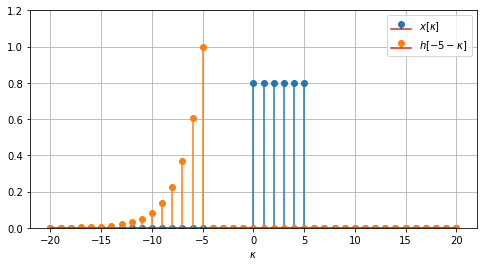

In [11]:
h3 = h(-5 + kappa[::-1])

plot_signals(n, x1, h3, r'$x[\kappa]$', r'$h[-5 -\kappa]$', r'$\kappa$')

De acuerdo a esto es claro que para este caso

\begin{equation}
y[n] = 0 \qquad \text{for } k < 0
\end{equation}

El segundo caso, cuando hay traslape parcial, se ilustra ahora para $n = 3$ (desplazamiento hacia la izquierda).

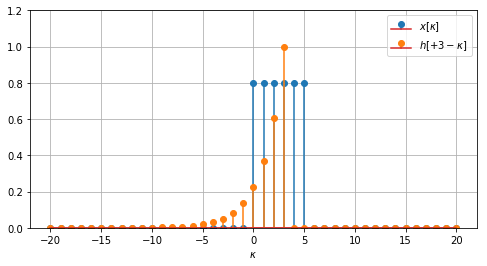

In [12]:
h4 = h(3 + kappa[::-1])

plot_signals(n, x1, h4, r'$x[\kappa]$', r'$h[+3 -\kappa]$', r'$\kappa$')

Entonces, para este caso la suma de convolución otorga:

\begin{equation}
y[n] = \frac{4}{5} \sum_{\kappa=0}^{n} e^{-\frac{n - \kappa}{2}}  \qquad \text{para } 0 \leq n < 6
\end{equation}

El tercer caso, traslape total, se ilustra para $n = 10$.

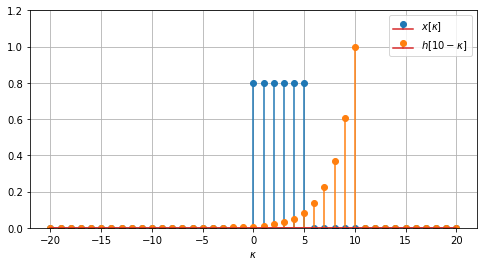

In [13]:
h5 = h(10 + kappa[::-1])

plot_signals(n, x1, h5, r'$x[\kappa]$', r'$h[10 -\kappa]$', r'$\kappa$')

En este tercer caso, la integral de convolución es:

\begin{equation}
y[n] = \frac{4}{5} \sum_{\kappa=0}^{5} e^{-\frac{n - \kappa}{2}}  \qquad \text{para } n \geq 6
\end{equation}

El resultado total se compone de estos tres resultados indivisuales. Como una alternativa y con el objetivo de graficar el resultado, la convolución se evalúa numéricamente mediante la función de numpy `convolve`.


NOTA: Esta función `convolve` realiza una convolución plana y no toma encuenta alineamientos particulares respecto a $k$. Por lo tanto, podría ser necesario adaptar el resultado obtenido para obtener un alineamiento adecuado respecto a $k$ si ambas señales no comenzaran exactamente en $k=0$.

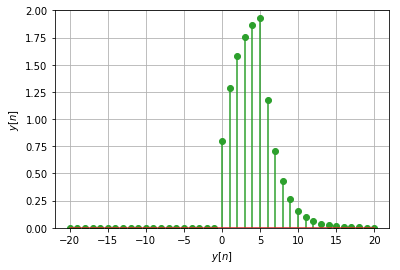

In [15]:
def y(n):
    return np.convolve(x(n), h(n), mode='same')

plt.stem(n, y(n), linefmt='C2-', markerfmt='C2o')
plt.xlabel(r'$y[n]$')
plt.ylabel(r'$y[n]$')
plt.ylim([0, 2])
plt.grid(True)

***
### Convolución lineal de señales de largo finito

El largo de una señal discreta $x[n]$ se puede definir por el número total de muestras entre la primera muestra distinta de cero y la última muestra que es cero, más uno. Esto podría incluir cero entre estos límites.

Una señal finita es una señal cuyo largo es finito. De acuerdo a esta definición, el impulso de Dirac $\delta[n]$ es una señal finita de largo uno.

<div class="alert alert-block alert-info">
La convolución lineal de dos señales finitas es de importancia práctica dado que la convolución solo se puede evaular numéricamente, por ejemplo en un computador, para señales finitas. Cualquier señal infinita se puede truncar a una señal finita de interés multiplicándola por un rect adecuadamente desplazado $\sqcap_N[n - \kappa]$. 
</div>

Es por lo tanto, suficiente considerar la convolución de dos señales causales rectangulares de largo $N, M \in \mathbb{N}$

\begin{equation}
y[k] = \sqcap_N[k] * \sqcap_M[k]
\end{equation}

para tener una idea del funcionamiento de la convolución de dos señales finitas arbitrarias. 

Siguiendo la interpretación gráfica de la convolución lineal, el resultado para $N \leq M$ se puede obtener como

\begin{equation}
y[n] = \begin{cases}
0 & \text{para }  n < 0 \\
n+1 & \text{para } 0 \leq n < N \\
N & \text{para } N \leq n < M \\
N+M-1-n & \text{para } M \leq n < N+M-1\\
0 & \text{para } n \geq N+M-1.
\end{cases}
\end{equation}

Por lo tanto, la convolución de dos señales rectangulares es una señal finita. El largo de esta señal es $N+M-1$. Esta intuición se puede generalizar para la convolución de dos señales finitas arbitrarias siguiendo el siguiente razonamiento:

La convolución de dos señales finitas de largo $N$ y $M$ respectivamente, resulta en una señal finita de largo $N+M-1$.

Para dos señales causales $x[n]$ y $h[n]$ de largos finitos $N$ y $M$ la convolución está dada por:

\begin{equation}
x[n] * h[n] = \sum_{\kappa = 0}^{N-1} x[\kappa] \cdot h[n - \kappa] = \sum_{\kappa = 0}^{M-1} x[n - \kappa] \cdot h[\kappa]
\end{equation}

para $0 \leq n < N+M-1$. El cálculo de cada muestra de salida requiere al menos $N$ multiplicaciones y $N-1$ sumas. La complejidad numérica de la convolución de $N$ muestras de salida es, por lo tanto [del orden de](https://en.wikipedia.org/wiki/Big_O_notation) $\mathcal{O} ( N^2 )$.

**Ejemplo**

La convolución de dos señales rectangulares $y[n] = \sqcap_N[n] * \sqcap_M[n]$ de largos $N$ y $M$ se calculará para el caso $N=7$ y $M=15$.

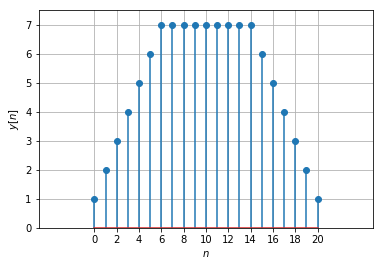

In [16]:
N = 7
M = 15

y = np.convolve(np.ones(N), np.ones(M), mode='full')

plt.stem(y)
plt.xlabel('$n$')
plt.ylabel('$y[n]$')
plt.ylim([0, N+.5])
plt.xlim([-5, 25])
plt.xticks(np.arange(0,21,2));
plt.grid(True)

**Ejercicio**

* Compruebe este resultado de forma analítica.

***
## Convolución periódica o circular

La [convolución periódica o circular o cíclica](https://en.wikipedia.org/wiki/Circular_convolution) de dos señales discretas finitas $x[n]$ y $h[n]$ se define como:

\begin{equation}
x[n] \circledast_P h[n] = \sum_{\kappa=0}^{P-1} \tilde{x}_P[n - \kappa] \; \tilde{h}_P[\kappa] =
\sum_{\kappa=0}^{P-1} \tilde{x}_P[\kappa] \; \tilde{h}_P[n - \kappa]
\end{equation}

donde $\circledast_P$ denota la **convolución circular de período $P$**. La sumas periódicas $\tilde{x}_P[n]$ de $x[n]$ y $\tilde{h}_P[n]$ de $h[n]$ con período $P$ se definen mediante:

\begin{align}
\tilde{x}_P[n] &= \sum_{\nu = -\infty}^{\infty} x[\nu \cdot P + n] \\
\tilde{h}_P[n] &= \sum_{\nu = -\infty}^{\infty} h[\nu \cdot P + n]
\end{align}

El resultado de la convolución circular tiene período $P$. La convolución periódica de dos señales es en general distinta a la convolución lineal.

En el caso especial en que el largo de una o ambas señales $x[n]$ y $h[n]$ sea menor o igual al período $P$, la suma periódica se convierte en una continuación periódica de la señal o señales. Más aún, la continuación periódica debe hacerse solo para la señal desfasada en la suma de convolución. En este caso especial, la convolución periódica usualmente se llama **convolución cíclica**.

**Ejemplo - Convolución periódica versus lineal**

La covolución periódica $y_1[n] = x[n] \circledast_P h[n]$ y la lineal $y_2[n] = x[n] * h[n]$ de dos señales  $x[n] = \sqcap_M[n]$ y $h[n] = \sqcap_N[n]$ será evaluada numéricamente. Para estos propósitos, construimos las siguiente funciones auxiliares que implementan la suma y convolución periódica.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def periodic_summation(x, P):
    'Zero-padding to length P or periodic summation with period P.'
    N = len(x)
    rows = int(np.ceil(N/P))

    if (N < int(P*rows)):
        x = np.pad(x, (0, int(P*rows-N)), 'constant')

    x = np.reshape(x, (rows, P))

    return np.sum(x, axis=0)


def periodic_convolve(x, y, P):
    'Periodic convolution of two signals x and y with period P.'
    x = periodic_summation(x, P)
    h = periodic_summation(y, P)

    return np.array([np.dot(np.roll(x[::-1], k+1), h) for k in range(P)], float)

Calculemos ahora las convoluciones y grafiquemos las señales resultantes. Notamos que para las señales periódicas  $\tilde{x}_P[n]$ y $y_1[n]$ solo se muestra un sólo período.

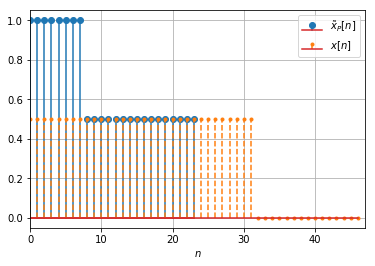

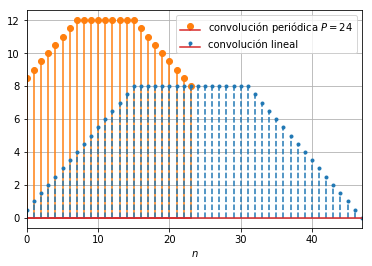

In [18]:
M = 32  # length of signal x[k]
N = 16  # length of signal h[k]
P = 24  # period of periodic convolution


def rect(n, N):
    return np.where((0 <= n) & (n < N), 1.0, 0.0)


# generate signals
n = np.arange(M+N-1)
x = .5 * rect(n, M)
h = rect(n, N)

# periodic convolution
y1 = periodic_convolve(x, h, P)
# linear convolution
y2 = np.convolve(x, h, 'full')

# plot results
plt.figure()
plt.stem(periodic_summation(x, P), linefmt='C0-',
         markerfmt='C0o', label=r'$\tilde{x}_P[n]$')
plt.stem(x, linefmt='C1--', markerfmt='C1.', label=r'$x[n]$')
plt.xlabel(r'$n$')
plt.xlim([0, M+N-1])
plt.legend()
plt.grid()

plt.figure()
plt.stem(y1, linefmt='C1-', markerfmt='C1o',
         label=r'convolución periódica $P={}$'.format(P))
plt.stem(y2, linefmt='C0--', markerfmt='C0.', label=r'convolución lineal')
plt.xlabel(r'$n$')
plt.xlim([0, M+N-1])
plt.legend()
plt.grid()

**Ejercicio**

* Cambie el largo $M$ de la señal rectangular $x[k]$. ¿Como cambia el resultado de la convolución circular?
* Compare el resultado de la convolución periódica con la lineal. ¿Para qué valores de $P$ ambas dan el mismo resultado?

***
<a name="equivalencia_lineal_periodica"></a>
### Equivalencia de convolución lineal y periódica

Sabemos que la convolución lineal de una señal causal $x_L[k]$ de longitud $L$ con una señal causal $h_N[k]$ de longitud $N$ lee

\begin{equation}
y[k] = x_L[k] * h_N[k] = \sum_{\kappa = 0}^{L-1} x_L[\kappa] \; h_N[k - \kappa] = \sum_{\kappa = 0}^{N-1} h_N[\kappa] \; x_L[k - \kappa]
\end{equation}

La señal resultante $y[k]$ es de longitud finita $M = N+L-1$. Sin pérdida de generalidad se supone a continuación que $N \leq L$. El cálculo de $y[k]$ para $k=0,1, \dots, M-1$ requiere multiplicaciones de $M \cdot N$ y adiciones de $M \cdot (N-1)$. La complejidad computacional de la convolución es consecuentemente de [orden](https://en.wikipedia.org/wiki/Big_O_notation) $\mathcal{O}(M \cdot N)$.

La convolución periódica o circular o cíclica)] de dos señales $x_L[k]$ y $h_N[k]$ se define como

\begin{equation}
x_L[k] \circledast_P h_N[k] = \sum_{\kappa=0}^{P-1} \tilde{x}_P[k - \kappa] \; \tilde{h}_P[\kappa]
\end{equation}

donde $\circledast_P$ denota la convolución periódica con período $P$. Las sumas periódicas $\tilde{x}_P[k]$ de $x[k]$ y $\tilde{h}_P[k]$ de $h[k]$ con el período $P$ se definen como

\begin{align}
\tilde{x}_P[k] &= \sum_{\nu = -\infty}^{\infty} x_L[\nu \cdot P + k] \\
\tilde{h}_P[k] &= \sum_{\nu = -\infty}^{\infty} h_N[\nu \cdot P + k]
\end{align}

El resultado de la convolución circular tiene un período de $P$.

#### ¿Existe alguna forma de calcular una convolución lineal mediante una convolución cíclica?
La respuesta es sí. Para calcular la convolución lineal por una convolución periódica, uno debe tener cuidado de que el resultado de la convolución lineal se ajuste a un período de la convolución periódica. Por lo tanto, la periodicidad debe elegirse como $P \geq M$ donde $M = N+L-1$. Esto se puede lograr mediante el [acolchamiento](./35-Propiedades_de_la_DFT.ipynb#acolchamiento) $x_L[k]$ a la longitud total de $M$, lo que da como resultado la señal $x_M[k]$ de longitud $M$, que se define como

\begin{equation}
x_M[k] = \begin{cases} 
x_L[k] & \text{for } 0 \leq k < L \\
0 & \text{for } L \leq k < M
\end{cases}
\end{equation}

De forma similar se puede hacer para $h_N[k]$, que resulta en la señal $h_M[k]$ con acolchamiento:

\begin{equation}
h_M[k] = \begin{cases} 
h_N[k] & \text{for } 0 \leq k < N \\
0 & \text{for } N \leq k < M
\end{cases}
\end{equation}

Usando estas señales, la convolución lineal y periódica son equivalentes para las primeras muestras de $M$ $k = 0,1,\dots, M-1$

\begin{equation}
x_L[k] * h_N[k] = x_M[k] \circledast_M h_M[k]
\end{equation}

#### Ejemplo: convolución lineal y cíclica de dos señales rectangulares

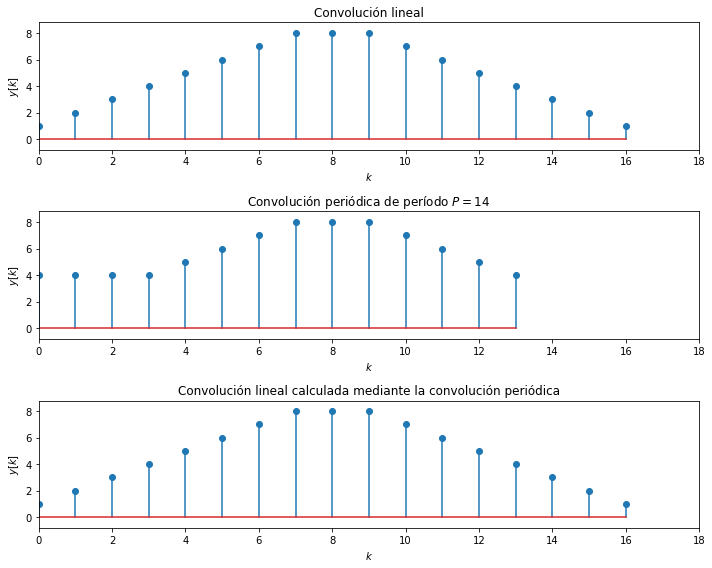

In [15]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

L = 8  # largo de la señal x[k]
N = 10  # largo de la respuesta al impulso h[k]
P = 14 # periodicidad para la convolución periódica

# Función que calcula la convolución periódica mediante la fft
def cconv(in1,in2,period):
    return np.fft.ifft(np.fft.fft(in1, period) * np.fft.fft(in2, period))

# Las señales de prueba son dos rects de largos L y N
x = np.ones(L)
h = np.ones(N)


y1 = np.convolve(x, h, 'full') # convolución lineal

y2 = cconv(x, h, int(P)) # convolución periódica

xp = np.append(x, np.zeros(N-1)) #acolchamiento
hp = np.append(h, np.zeros(L-1)) #acolchamiento

y3 = cconv(xp, hp, L+N-1) # convolución periódica de las señales acolchadas


def plot_signal(x):
    plt.stem(x)
    plt.xlabel('$k$')
    plt.ylabel('$y[k]$')
    plt.xlim([0, N+L])
    plt.gca().margins(y=0.1)

plt.figure(figsize = (10, 8))
plt.subplot(3,1,1)
plot_signal(y1)
plt.title('Convolución lineal')

plt.subplot(3,1,2)
plot_signal(y2)
plt.title('Convolución periódica de período $P=%d$'%P)

plt.subplot(3,1,3)
plot_signal(y3)
plt.title('Convolución lineal calculada mediante la convolución periódica')
plt.tight_layout()


plt.show()

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>